In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
mat=scipy.io.loadmat('ex5data1')

In [3]:
#Data initialisation
X=mat['X']
y=mat['y']
Xtest=mat['Xtest']
ytest=mat['ytest']
Xval=mat['Xval']
yval=mat['yval']
m=X.shape[0]
n=X.shape[0]+1


In [4]:
print(X.shape,y.shape,Xtest.shape,ytest.shape,Xval.shape, yval.shape)

(12, 1) (12, 1) (21, 1) (21, 1) (21, 1) (21, 1)


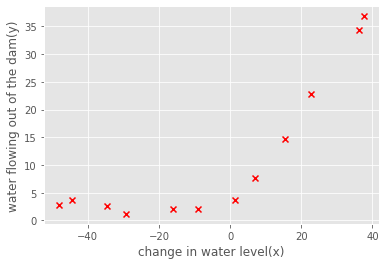

In [5]:
#plot data
plt.style.use('ggplot')
plt.scatter(X,y, marker='x', c='red')
plt.xlabel('change in water level(x)')
plt.ylabel('water flowing out of the dam(y)')
plt.show()

In [6]:
x0=np.ones((X.shape[0],1))
X=np.concatenate((x0,X), axis=1)
xval0=np.ones((Xval.shape[0],1))
Xval=np.concatenate((xval0,Xval), axis=1)


In [7]:
#Cost function
def cost(X,y,theta,lamda):

    h=np.matmul(X,theta)
    reg_cost=(lamda/(2*m))*(theta[1:,:]**2).sum()
    J= (1/(2*m))*((h-y)**2).sum() + reg_cost
    return J

In [8]:
#implementing Linear Regression

def trainLinearReg(X,y,lamda):
    
    iterations=100000
    alpha=0.001
    theta_t=np.zeros((X.shape[1],1))

    for i in range(iterations):

        h=np.matmul(X,theta_t)
        reg_cost=(lamda/(2*m))*(theta_t[1:,:]**2).sum()
        Jtrain= (1/(2*m))*((h-y)**2).sum() + reg_cost


        reg_grad= (lamda/m)*theta_t
        grad=(1/m)*(np.matmul(X.T,(h-y))) + reg_grad
        grad[0,0]=grad[0,0]-reg_grad[0,0]

        theta_t= theta_t-alpha*grad

    return theta_t 

In [9]:
#Learning Curve
def learningcurve(X):
    
    lamda=0
    J_train=np.zeros((m,1))
    J_val=np.zeros((m,1))
    for i in range(m):
        theta= trainLinearReg(X[:i+1,:],y[:i+1,:],lamda)
        J_train[i,0]= cost(X[:i+1,:],y[:i+1,:],theta,lamda) 
        J_val[i,0]= cost(Xval,yval,theta,lamda)
    


In [10]:
#polynomial Feature addition
p=8
X_poly=X[:,1].copy()
X_poly=X_poly[:,np.newaxis]
X_t=X_poly.copy()
X_t2=Xval[:,1:]
for j in range(2,p+1):
    X_poly=np.concatenate((X_poly,X_t**j),axis=1)
    Xval=np.concatenate((Xval,X_t2**j),axis=1)



In [11]:
X_t2=Xval[:,1:]

In [12]:
#feature normalisation
def normalise(X):
    mu= np.mean(X, axis=0)
    sigma=np.std(X,axis=0)
    x_norm= (X-mu)/sigma
    X = x_norm
    return x_norm
    
X_poly_norm=normalise(X_poly)
Xval_norm=normalise(Xval[:,1:])
x0=np.ones((X_poly.shape[0],1))
X_poly_norm=np.concatenate((x0,X_poly_norm), axis=1)
X_poly_norm.shape
xval0=np.ones((Xval.shape[0],1))
Xval_norm=np.concatenate((xval0,Xval_norm), axis=1)

In [13]:
lamda=3
J_train=np.zeros((m,1))
J_val=np.zeros((m,1))
for i in range(m):
    theta= trainLinearReg(X_poly_norm[:i+1,:],y[:i+1,:],lamda)
    J_train[i,0]= cost(X_poly_norm[:i+1,:],y[:i+1,:],theta,lamda) 
    J_val[i,0]= cost(Xval_norm,yval,theta,lamda)
    


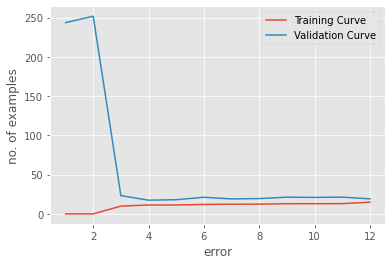

In [14]:
m_array=range(1,13)
plt.style.use('ggplot')
#plt.scatter(X[:,1],y, marker='x', c='red')
plt.plot(m_array,J_train,label='Training Curve')
plt.plot(m_array,J_val,label='Validation Curve')

plt.xlabel('error')
plt.ylabel('no. of examples')
plt.legend()
plt.show()
